In [54]:
import tensorflow as tf
print(tf.__version__)

import numpy as np  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from keras.models import Sequential  
from keras.layers import Dropout, Flatten, Dense  
from keras import applications 
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt  
import math  
import datetime

1.14.0


In [20]:
img_width, img_height = 224, 224
top_model_weights_path = 'bottleneck_fc_model2.h5'  
train_data_dir = "C:/Users/Akhil/Documents/kneeKL224/train"
validation_data_dir = "C:/Users/Akhil/Documents/kneeKL224/val"
test_data_dir = "C:/Users/Akhil/Documents/kneeKL224/test"

epochs = 100
 
batch_size = 32

In [21]:
vgg16 = applications.VGG16(include_top=False, weights='imagenet')

In [22]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [23]:
start = datetime.datetime.now()
   
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)  
   
np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 5778 images belonging to 5 classes.
Time:  0:14:10.477607


In [24]:

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg16.predict_generator(  
     generator, predict_size_validation)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 826 images belonging to 5 classes.
Time:  0:01:59.491855


In [25]:
start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = vgg16.predict_generator(  
     generator, predict_size_test)  
   
np.save('bottleneck_features_test.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 1656 images belonging to 5 classes.
Time:  0:03:42.498637


In [26]:

datagen_top = ImageDataGenerator(rescale=1./255)  
generator_top = datagen_top.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
 
train_data = np.load('bottleneck_features_train.npy')  
   
 
train_labels = generator_top.classes  
   
 
train_labels = to_categorical(train_labels) 


Found 5778 images belonging to 5 classes.


In [27]:
generator_top = datagen_top.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels)

Found 826 images belonging to 5 classes.


In [28]:
generator_top = datagen_top.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test.npy')  
   
test_labels = generator_top.classes
test_labels = to_categorical(test_labels)

Found 1656 images belonging to 5 classes.


In [29]:
num_classes

5

In [30]:
train_data.shape

(5778, 7, 7, 512)

In [1]:
from keras.layers.convolutional import Conv2D, MaxPooling2D


start = datetime.datetime.now()
model = Sequential() 
model.add(Conv2D(32, (3, 3), input_shape=train_data.shape[1:] , padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(512, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(5, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

history = model.fit(train_data, train_labels,  
      epochs=epochs,  
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] Accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Using TensorFlow backend.
C:\Users\Akhil\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Akhil\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Akhil\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Akhil\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

NameError: name 'datetime' is not defined

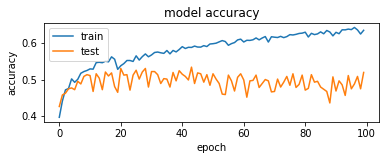

In [33]:
plt.figure(1)  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  


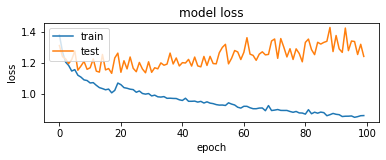

In [34]:


plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

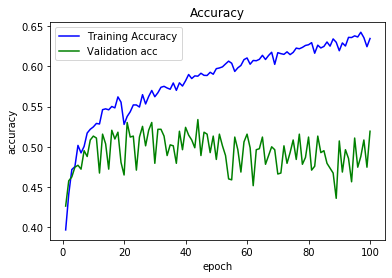

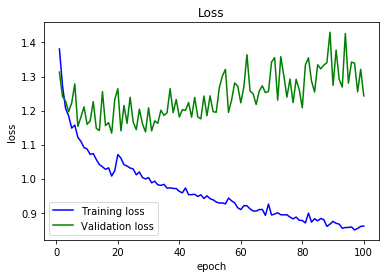

In [35]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'b', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch') 
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'b', label='Training loss')
plt.plot(epch, val_loss, 'g', label='Validation loss')
plt.title('Loss')
plt.ylabel('loss')  
plt.xlabel('epoch') 
plt.legend()
plt.show()

In [36]:
model.evaluate(test_data, test_labels)

1656/1656 [==============================] - 1s 304us/step


[1.1358855715120473, 0.5344203114509583]

In [37]:
print('test data', test_data)
preds = np.round(model.predict(test_data),0) 

print('rounded test_labels', preds)

test data [[[[1.11897254e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    1.35130572e+00 0.00000000e+00]
   [1.30373108e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    1.07076025e+00 0.00000000e+00]
   [6.44399881e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    6.10054970e-01 0.00000000e+00]
   ...
   [3.49017680e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    9.28968549e-01 0.00000000e+00]
   [5.38507223e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    9.19951022e-01 0.00000000e+00]
   [1.24157012e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    6.41287863e-01 0.00000000e+00]]

  [[1.24864686e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    1.22639525e+00 0.00000000e+00]
   [1.11917853e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    1.00332999e+00 0.00000000e+00]
   [6.17307186e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    5.43656230e-01 0.00000000e+00]
   ...
   [3.48045200e-01 0.00000000e+00 0.00000000e+0

rounded test_labels [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


In [39]:
from sklearn import metrics
preds = np.round(model.predict(test_data),0)
knee = ["Grade 0", "Grade 1", "Grade 2", "Grade 3", "Grade 4"]
classification_metrics = metrics.classification_report(test_labels, preds, target_names= knee)

C:\Users\Akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
print(classification_metrics)

              precision    recall  f1-score   support

     Grade 0       0.67      0.58      0.62       639
     Grade 1       0.00      0.00      0.00       296
     Grade 2       0.51      0.33      0.40       447
     Grade 3       0.61      0.38      0.47       223
     Grade 4       0.45      0.18      0.25        51

   micro avg       0.61      0.37      0.46      1656
   macro avg       0.45      0.29      0.35      1656
weighted avg       0.49      0.37      0.42      1656
 samples avg       0.37      0.37      0.37      1656



In [43]:
import pandas as pd
from sklearn.metrics import confusion_matrix
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)

confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [47]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import itertools

In [51]:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

    

Confusion matrix, without normalization


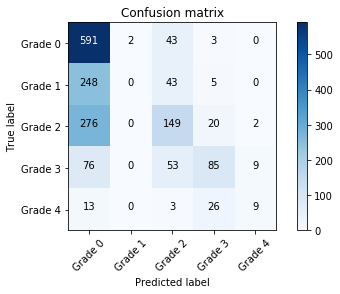

In [52]:
plot_confusion_matrix(confusion_matrix, ['Grade 0', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4'])

Normalized confusion matrix


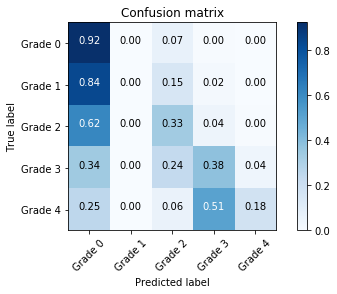

In [53]:
plot_confusion_matrix(confusion_matrix, 
                      ['Grade 0', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4'],
                     normalize=True)